In [33]:
import numpy as np

class MyKMeans:
    def __init__(self, k):
        self.k = k
        self.labels_ = []

    def fit(self, X):
        # Случайная инициализация центроидов
        centroids = [np.random.rand(X.shape[1]) for _ in range(self.k)]

        for _ in range(100):  # максимум итераций
            clusters = [[] for _ in range(self.k)]
            
            # Назначение точек ближайшему центроиду
            for x in X:
                dist = [np.linalg.norm(centroids[i] - x) for i in range(self.k)]
                i = dist.index(min(dist))
                clusters[i].append(x)

            new_centroids = []
            for i in range(self.k):
                if clusters[i]:  # если кластер не пустой
                    new_centroids.append(np.mean(clusters[i], axis=0))
                else:
                    # если кластер пустой — случайный центроид
                    new_centroids.append(np.random.rand(X.shape[1]))

            # Условие остановки: центроиды почти не изменились
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break

            centroids = new_centroids

        # Назначение итоговых меток
        for x in X:
            min_dist = float("+inf")
            for i in range(self.k):
                dist = np.linalg.norm(x - centroids[i])
                if dist < min_dist:
                    min_dist = dist
                    min_index = i
            self.labels_.append(min_index)

        return self

In [34]:
import numpy as np

x = np.array([
    [1, 4],
    [5, 9]
])

# Обучение модели
model = MyKMeans(k=2).fit(x)

# Метки кластеров для каждой точки
print("Метки кластеров:", model.labels_)


Метки кластеров: [0, 1]


In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import rand_score, silhouette_score, fowlkes_mallows_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [45]:
X1, y1 = make_blobs(n_samples=300, n_features=2, cluster_std=1, centers=7, random_state=762)
X2, y2 = make_blobs(n_samples=300, n_features=2, cluster_std=1, centers=10, random_state=421)

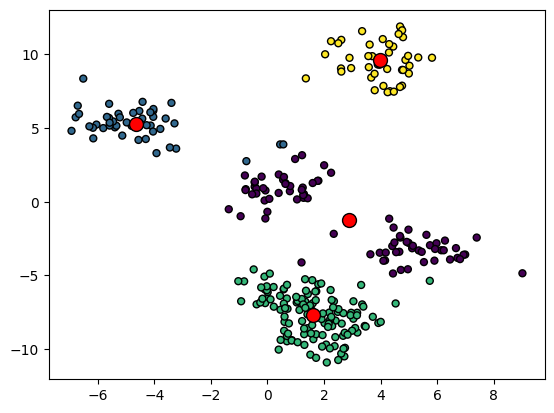

In [46]:
kmeans_1 = KMeans(n_clusters=4).fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_1.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

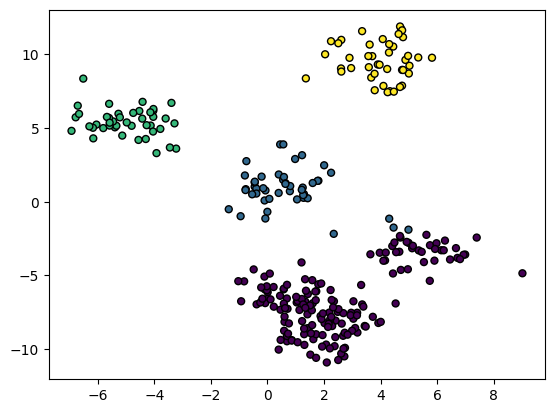

In [47]:
my_kmeans_1 = MyKMeans(k=4).fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=my_kmeans_1.labels_, edgecolors="k", s=25)
plt.show()

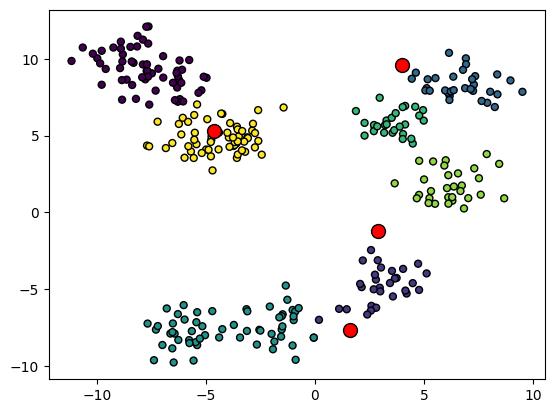

In [48]:
kmeans_2 = KMeans(n_clusters=7).fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans_2.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

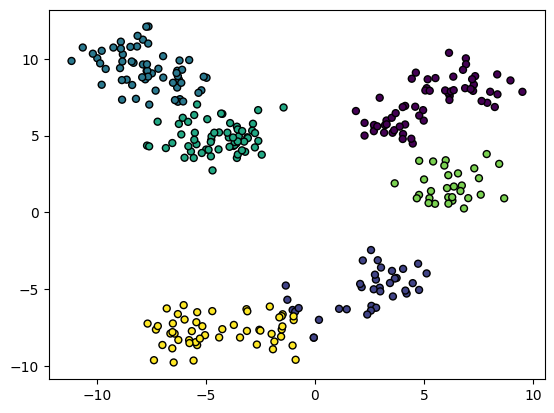

In [49]:
my_kmeans_2 = MyKMeans(k=7).fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=my_kmeans_2.labels_, edgecolors="k", s=25)
plt.show()